 # Machine Learning model

# Decision Tree

In [303]:
# Import  dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.cluster import KMeans

In [304]:
# reads all columns data
all_columns_df = pd.read_csv('Resources/all_columns_df.csv')
all_columns_df.head(10)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Critic_Score,User_Score,Year,Country,Total_Sales
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,Japan,82.86
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,Japan,40.24
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,Japan,37.14
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,2017.0,NaN,36.60
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,Japan,33.09
5,6,Pokemon Red / Green / Blue Version,Role-Playing,E,GB,Nintendo,Game Freak,9.4,NaN,1998.0,Japan,31.38
6,7,New Super Mario Bros.,Platform,E,DS,Nintendo,Nintendo EAD,9.1,8.1,2006.0,Japan,30.80
7,8,Tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,NaN,1989.0,Japan,30.26
8,9,New Super Mario Bros. Wii,Platform,E,Wii,Nintendo,Nintendo EAD,8.6,9.2,2009.0,Japan,30.22
9,10,Minecraft,Misc,NaN,PC,Mojang,Mojang AB,10.0,NaN,2010.0,NaN,30.01


In [305]:
# Determine the number of unique values in each column.
all_columns_df.nunique()

Rank            19862
Name            13840
Genre              20
ESRB_Rating         6
Platform           40
Publisher         926
Developer_x      3185
Critic_Score       86
User_Score         44
Year               45
Country            20
Total_Sales       648
dtype: int64

In [306]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
all_columns_df.drop(['Rank', 'Name', 'Year'], axis=1, inplace=True)

In [307]:
# Look at APPLICATION_TYPE value counts for binning
Developer_counts = all_columns_df['Developer_x'].value_counts()
Developer_counts

Unknown                      742
Konami                       402
Capcom                       350
EA Canada                    289
Bandai Namco Games           210
                            ... 
Separate Game Development      1
Yeti Trunk                     1
Atum Software                  1
Majesco Entertainment          1
Shockwave Productions          1
Name: Developer_x, Length: 3185, dtype: int64

<AxesSubplot:ylabel='Density'>

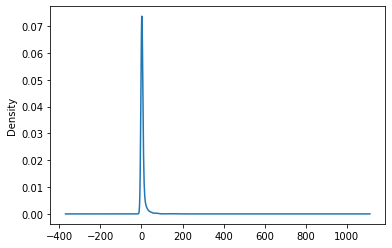

In [308]:
# Visualize the value counts of APPLICATION_TYPE
Developer_counts.plot.density()

In [309]:
# Determine which values to replace if counts are less than ...?
replace_dev = list(Developer_counts[Developer_counts < 200].index)

# Replace in dataframe
for app in replace_dev:
    all_columns_df.Developer_x = all_columns_df.Developer_x.replace(app,"Other")
    
# Check to make sure binning was successful
all_columns_df.Developer_x.value_counts()

Other                 17867
Unknown                 742
Konami                  402
Capcom                  350
EA Canada               289
Bandai Namco Games      210
Name: Developer_x, dtype: int64

In [310]:
# Look at Publisher value counts for binning
Publisher_counts = all_columns_df['Publisher'].value_counts()
Publisher_counts

Activision         1027
Ubisoft             949
Electronic Arts     822
Konami              767
Nintendo            753
                   ... 
Dan Walters           1
Game Arts             1
ArtwareGames          1
Indie Voyage          1
GMX Media             1
Name: Publisher, Length: 926, dtype: int64

<AxesSubplot:ylabel='Density'>

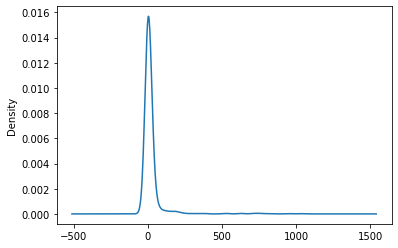

In [311]:
# Visualize the value counts of APPLICATION_TYPE
Publisher_counts.plot.density()

In [312]:
# Determine which values to replace if counts are less than ...?
replace_pub = list(Publisher_counts[Publisher_counts < 700].index)

# Replace in dataframe
for app in replace_pub:
    all_columns_df.Publisher = all_columns_df.Publisher.replace(app,"Other")
    
# Check to make sure binning was successful
all_columns_df.Publisher.value_counts()

Other              14115
Activision          1027
Ubisoft              949
Electronic Arts      822
Konami               767
Nintendo             753
THQ                  718
Sega                 711
Name: Publisher, dtype: int64

In [313]:
# Look at Publisher value counts for binning
Platform_counts = all_columns_df['Platform'].value_counts()
Platform_counts

DS      2265
PS2     2218
PC      2142
PS3     1373
Wii     1360
PSP     1318
X360    1310
PS      1207
PS4      940
GBA      858
XB       836
PSV      645
3DS      627
GC       563
XOne     539
N64      322
NS       281
SNES     241
SAT      175
WiiU     161
2600     133
NES      102
GB        94
DC        52
GEN       31
NG        12
PSN       10
GBC        9
WS         7
XBL        7
SCD        6
3DO        4
Mob        4
VC         3
PCE        2
WW         1
GG         1
OSX        1
PCFX       1
Amig       1
Name: Platform, dtype: int64

<AxesSubplot:ylabel='Density'>

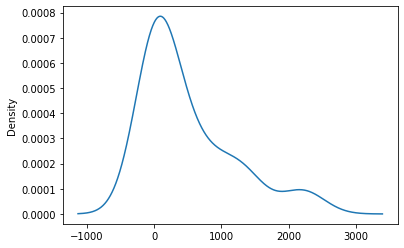

In [314]:
# Visualize the value counts of APPLICATION_TYPE
Platform_counts.plot.density()

In [315]:
# Determine which values to replace if counts are less than ...?
replace_plat = list(Platform_counts[Platform_counts < 1500].index)

# Replace in dataframe
for app in replace_plat:
    all_columns_df.Platform = all_columns_df.Platform.replace(app,"Other")
    
# Check to make sure binning was successful
all_columns_df.Platform.value_counts()

Other    13237
DS        2265
PS2       2218
PC        2142
Name: Platform, dtype: int64

In [316]:
all_columns_df.dtypes

Genre            object
ESRB_Rating      object
Platform         object
Publisher        object
Developer_x      object
Critic_Score    float64
User_Score      float64
Country          object
Total_Sales     float64
dtype: object

In [317]:
all_columns_df.isna().sum()

Genre               0
ESRB_Rating      5937
Platform            0
Publisher           0
Developer_x         2
Critic_Score    15156
User_Score      19624
Country          7985
Total_Sales         0
dtype: int64

In [318]:
all_columns_df.drop('User_Score',axis=1,inplace=True)

In [319]:
all_columns_df.isna().sum()

Genre               0
ESRB_Rating      5937
Platform            0
Publisher           0
Developer_x         2
Critic_Score    15156
Country          7985
Total_Sales         0
dtype: int64

In [320]:
all_columns_df.dtypes

Genre            object
ESRB_Rating      object
Platform         object
Publisher        object
Developer_x      object
Critic_Score    float64
Country          object
Total_Sales     float64
dtype: object

In [321]:
all_columns_df.nunique()

Genre            20
ESRB_Rating       6
Platform          4
Publisher         8
Developer_x       6
Critic_Score     86
Country          20
Total_Sales     648
dtype: int64

In [322]:
all_columns_df = all_columns_df.dropna()

In [323]:
all_columns_df.isna().sum()

Genre           0
ESRB_Rating     0
Platform        0
Publisher       0
Developer_x     0
Critic_Score    0
Country         0
Total_Sales     0
dtype: int64

In [324]:
all_columns_df.shape

(3579, 8)

In [325]:
all_columns_df['Successful'] = np.where(all_columns_df['Critic_Score'] >= 7.0, int('0'), int('1'))
all_columns_df.head()

,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Critic_Score,Country,Total_Sales,Successful
0,Sports,E,Other,Nintendo,Other,7.7,Japan,82.86,0
2,Racing,E,Other,Nintendo,Other,8.2,Japan,37.14,0
4,Sports,E,Other,Nintendo,Other,8.0,Japan,33.09,0
5,Role-Playing,E,Other,Nintendo,Other,9.4,Japan,31.38,0
6,Platform,E,DS,Nintendo,Other,9.1,Japan,30.80,0


all_columns_df['Successful'] = np.where(all_columns_df['Critic_Score'] >= 7.0, int('0'), int('1'))
all_columns_df.head()

# Encode Object into numerical values

In [326]:
cat = all_columns_df.select_dtypes(include='object')

In [327]:
cat=list(cat.columns)

In [328]:
cat

['Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Developer_x', 'Country']

In [329]:
from sklearn.preprocessing import OneHotEncoder
Oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc_df = pd.get_dummies(data=all_columns_df,
    columns=cat)
# merge with main df bridge_df on key values
# all_columns_df1 = all_columns_df.join(enc_df)
# all_columns_df1.head(2)

In [330]:
#num=all_columns_df.columns.drop(cat)

In [331]:
#df=pd.concat([all_columns_df[num], enc_df.drop('Total_Sales',axis=1)], axis=1)
df

,Critic_Score,Total_Sales,Critic_Score,Genre_Action,Genre_Action-Adventure,Genre_Adventure,Genre_Fighting,Genre_MMO,Genre_Misc,Genre_Platform,...,Developer_x_Visceral Games,Developer_x_Yuke's Future Media Creators,Developer_x_Zipper Interactive,Developer_x_id Software,Developer_x_n-Space,Developer_x_tri-Ace,Country_Europe,Country_France,Country_Japan,Country_United States
2,8.2,37.14,8.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,8.0,33.09,8.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,9.1,30.80,9.1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,8.6,30.22,8.6,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
11,5.9,28.02,5.9,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14287,7.3,0.06,7.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15320,7.4,0.05,7.4,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15500,3.8,0.05,3.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15546,6.5,0.04,6.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [332]:
# Scale and standardize data: mean is ), std dev is 1
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

In [333]:
# Train the scaler and transform the data
vg_data_scaled = data_scaler.fit_transform(df)

In [334]:

# Preview the scaled data
vg_data_scaled[:5]

array([[ 0.03206089,  5.55025943,  0.03206089, -0.55522129, -0.153393  ,
        -0.32905965, -0.21952852, -0.10783277, -0.10783277, -0.39027923,
        -0.07602859,  5.81377674, -0.47471266, -0.46559985, -0.07602859,
        -0.153393  , -0.13245324,  2.10653744, -0.35011519, -0.73472649,
        -0.74402381, -0.07602859, -0.27216553, -0.18898224, -0.10783277,
        -0.30714756, -0.153393  , -0.17200523, -0.27216553, -0.52859414,
        -0.07602859, -0.07602859, -0.23354968,  1.86052102, -0.17200523,
        -0.37047929, -0.10783277, -0.07602859, -0.13245324, -0.27216553,
        -0.07602859, -0.13245324, -0.13245324, -0.10783277, -0.32905965,
        -0.07602859, -0.10783277, -0.21952852, -0.21952852, -0.07602859,
        -0.13245324, -0.07602859, -0.07602859,  1.89181061, -0.17200523,
        -0.28415725, -0.41913682, -0.20473438, -0.17200523, -0.29580399,
        -0.07602859, -0.07602859, -0.07602859, -0.07602859, -0.07602859,
        -0.10783277, -0.07602859, -0.07602859, -0.0

In [335]:
# Verify that the mean of each column is 0 and its standard deviation is 1:
print(np.mean(vg_data_scaled[:,0]))
print(np.std(vg_data_scaled[:,0]))

2.8585052588050007e-16
1.0


In [336]:

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [337]:
# Define the features set.
X = enc_df.copy()
X = X.drop("Successful", axis=1)
X.head()

,Critic_Score,Total_Sales,Genre_Action,Genre_Action-Adventure,Genre_Adventure,Genre_Board Game,Genre_Education,Genre_Fighting,Genre_MMO,Genre_Misc,...,Country_Europe,Country_Finland,Country_France,Country_Japan,Country_Norway,Country_Poland,Country_Russia,Country_South Korea,Country_United Kingdom,Country_United States
0,7.7,82.86,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,8.2,37.14,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8.0,33.09,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,9.4,31.38,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,9.1,30.80,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [338]:
# Define the target set.
y = enc_df["Successful"].values
y[:5]

array([0, 0, 0, 0, 0])

In [339]:
# Split the Data Into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [340]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2684, 54)
(895, 54)
(2684,)
(895,)


In [341]:
# Splitting into Train and Test sets into an 80/20 split.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=78, train_size=0.80)

In [342]:
# Determine the shape of our training and testing sets.
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(2863, 54)
(716, 54)
(2863,)
(716,)


In [343]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [344]:
# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)

In [345]:
# Making predictions using the testing data.
predictions = model.predict(X_test_scaled)
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [346]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,627,0
Actual 1,0,268


In [347]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
acc_score

1.0

In [348]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,627,0
Actual 1,0,268


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       627
           1       1.00      1.00      1.00       268

    accuracy                           1.00       895
   macro avg       1.00      1.00      1.00       895
weighted avg       1.00      1.00      1.00       895

